In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro

In [2]:
%cd C:\Users\DWAIPAYAN\Desktop\Data Analysis Datasets

C:\Users\DWAIPAYAN\Desktop\Data Analysis Datasets


In [3]:
df=pd.read_csv('GoBike_sharing_dataset.csv')

In [4]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
# Checking datatypes of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
#checking for null values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
#Changing to datetime dattatype
df['datetime']=pd.to_datetime(df['datetime'])

In [8]:
#Seggregating date and time into different columns
df['date']=df['datetime'].dt.date
df['time']=df['datetime'].dt.time
df['month']=df['datetime'].dt.month
df['year']=df['datetime'].dt.year

In [9]:
#Assigning season names to numeric values
df['season']=df['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [10]:
df=df.loc[:,['datetime','date', 'time','month','year', 'season', 'holiday', 'workingday', 'weather', 'temp',
             'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

## Baseline Statistics

In [11]:
df[['temp','atemp', 'humidity', 'windspeed','casual', 'registered', 'count']].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


##  Season wise count analysis

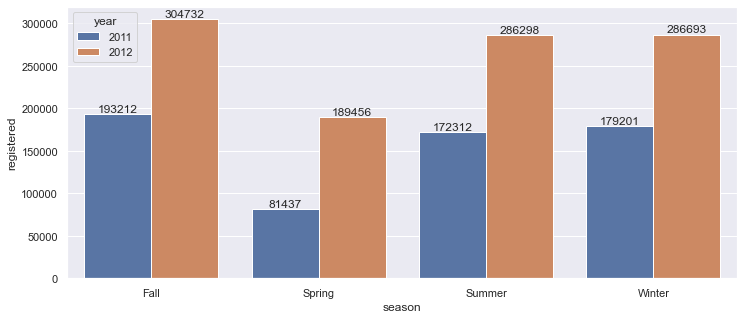

In [12]:
df_seasonal_count=df.groupby(['year','season'],as_index=False)['registered'].sum()
sns.set(rc={'figure.figsize':(12,5)})
ax=sns.barplot(x = 'season',y= 'registered' ,hue='year',data = df_seasonal_count)

for bars in ax.containers:
    ax.bar_label(bars)

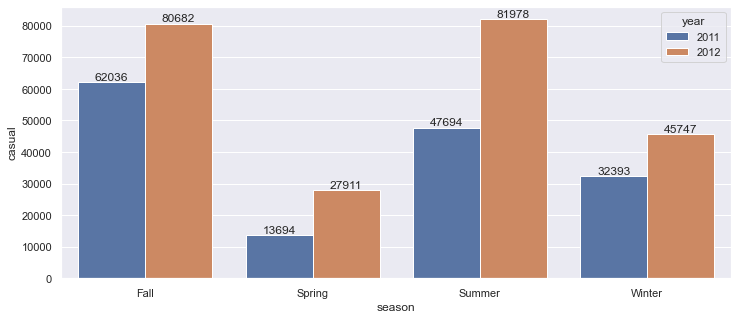

In [13]:
df_seasonal_count=df.groupby(['year','season'],as_index=False)['casual'].sum()
sns.set(rc={'figure.figsize':(12,5)})
ax=sns.barplot(x = 'season',y= 'casual' ,hue='year',data = df_seasonal_count)

for bars in ax.containers:
    ax.bar_label(bars)

## Year and Month wise count Analysis

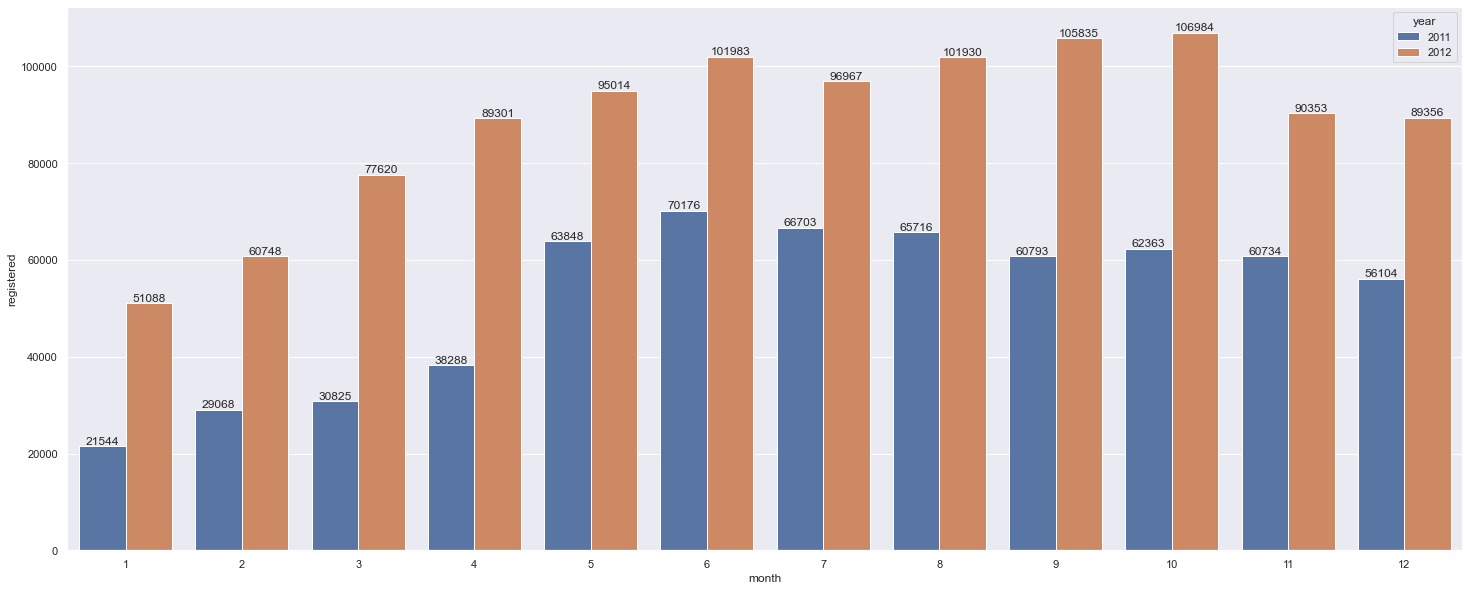

In [14]:
df_seasonal_count=df.groupby(['year','month'],as_index=False)['registered'].sum()
sns.set(rc={'figure.figsize':(25,10)})
ax=sns.barplot(x = 'month',y= 'registered' ,hue='year',data = df_seasonal_count)

for bars in ax.containers:
    ax.bar_label(bars)

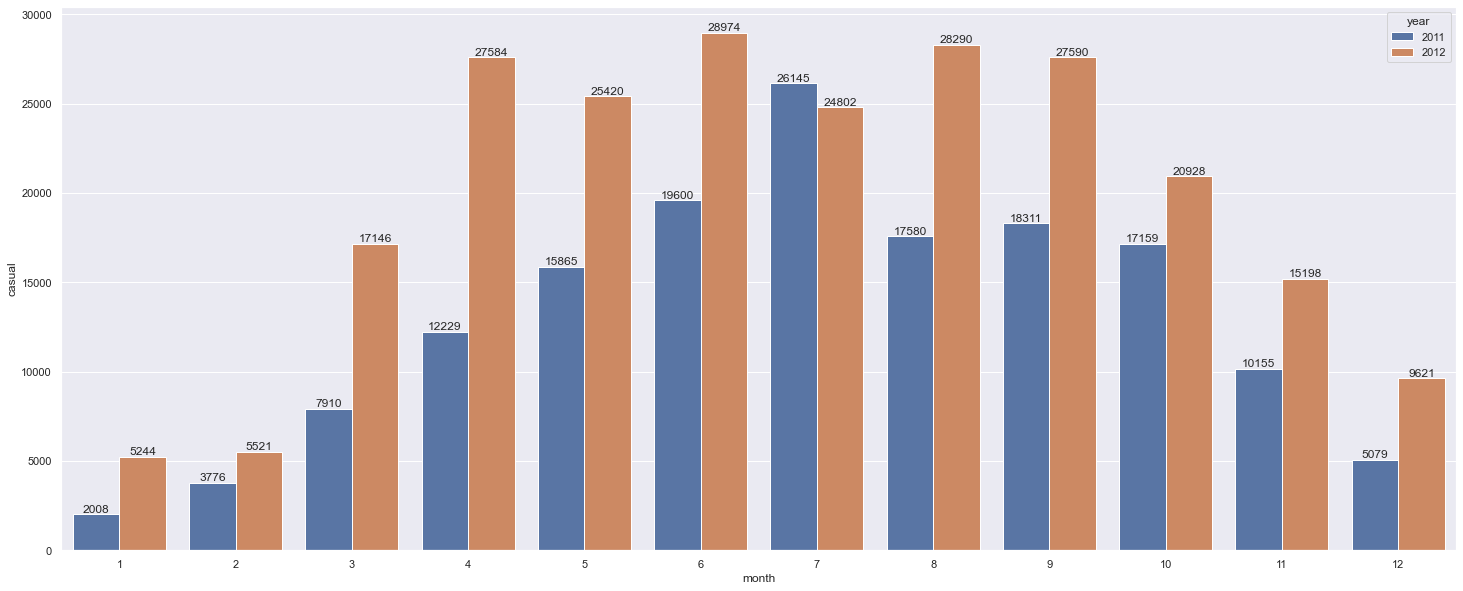

In [15]:
df_seasonal_count=df.groupby(['year','month'],as_index=False)['casual'].sum()
sns.set(rc={'figure.figsize':(25,10)})
ax=sns.barplot(x = 'month',y= 'casual' ,hue='year',data = df_seasonal_count)

for bars in ax.containers:
    ax.bar_label(bars)

## Weather wise count Analysis

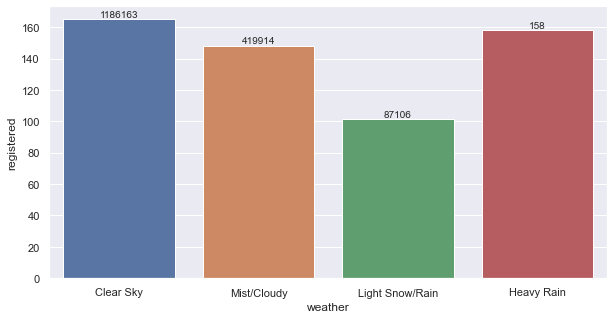

In [17]:
w_map = {1 : "Clear Sky",2:"Mist/Cloudy",3:"Light Snow/Rain",4:"Heavy Rain"}

ax4 = sns.barplot(data=df,x = "weather",y="registered",ci=None)
ax4.set_xticklabels([w_map[i] for i in range(1, 5)])
sns.set(rc={'figure.figsize':(10,5)})
for i,p in enumerate(ax4.patches):
    height = p.get_height()
    ax4.text(p.get_x() + p.get_width()/2,height,df[df["weather"] == i+1]["registered"].sum(),ha="center",va="bottom",fontsize = 10)

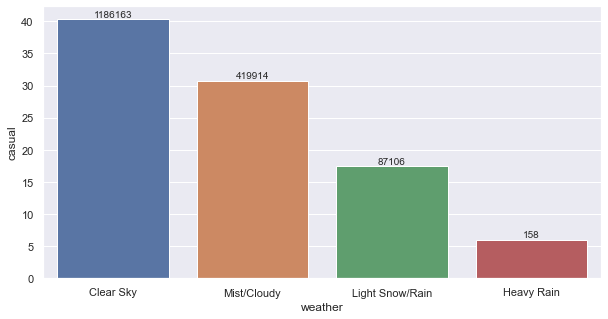

In [93]:
# Count of Registered User WRT To Season
w_map = {1 : "Clear Sky",2:"Mist/Cloudy",3:"Light Snow/Rain",4:"Heavy Rain"}

ax4 = sns.barplot(data=df,x = "weather",y="casual",ci=None)
ax4.set_xticklabels([w_map[i] for i in range(1, 5)])
sns.set(rc={'figure.figsize':(10,5)})
for i,p in enumerate(ax4.patches):
    height = p.get_height()
    ax4.text(p.get_x() + p.get_width()/2,height,df[df["weather"] == i+1]["registered"].sum(),ha="center",va="bottom",fontsize = 10)

## Weekday vs WorkingDay count analysis

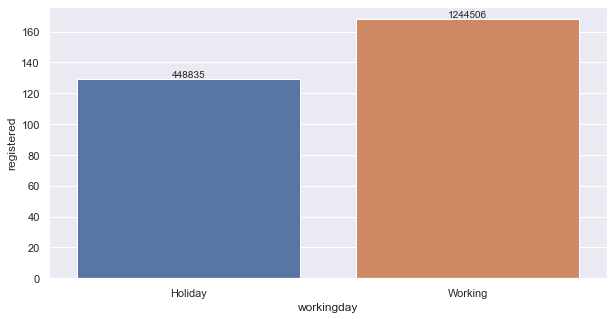

In [96]:
work_map = {0 : "Holiday",1 : "Working"}
ax3 = sns.barplot(data = df,x = "workingday",y = "registered",ci = None)
ax3.set_xticklabels([work_map[i] for i in range(0,2)])
for i,p in enumerate(ax3.patches):
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width()/2.,height,df[df["workingday"]== i]["registered"].sum(),ha="center",va = "bottom",fontsize = 10)

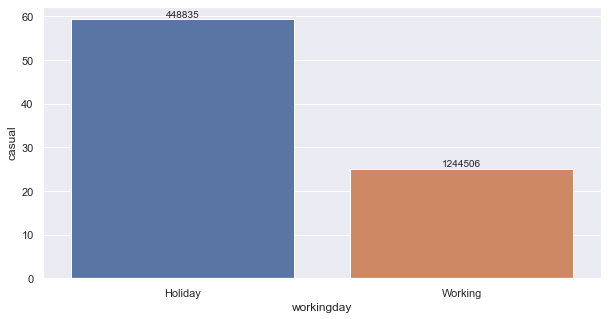

In [97]:
work_map = {0 : "Holiday",1 : "Working"}
ax3 = sns.barplot(data = df,x = "workingday",y = "casual",ci = None)
ax3.set_xticklabels([work_map[i] for i in range(0,2)])
for i,p in enumerate(ax3.patches):
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width()/2.,height,df[df["workingday"]== i]["registered"].sum(),ha="center",va = "bottom",fontsize = 10)

## Outlier Detection

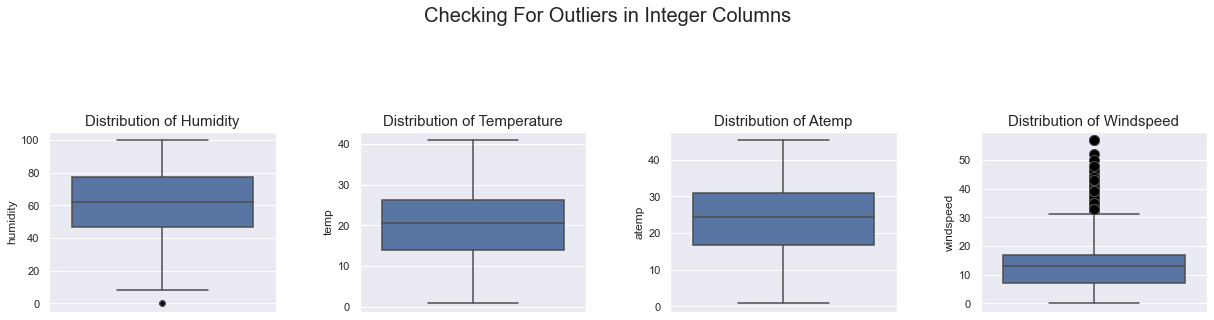

In [77]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

sns.boxplot(y=df['humidity'], ax=axes[0],flierprops=dict(markerfacecolor='black', marker='o'))
sns.boxplot(y=df['temp'], ax=axes[1],flierprops=dict(markerfacecolor='black', marker='o'))
sns.boxplot(y=df['atemp'],ax=axes[2],flierprops=dict(markerfacecolor='black', marker='o'))
sns.boxplot(y=df['windspeed'], ax=axes[3],fliersize=10,flierprops=dict(markerfacecolor='black', marker='o'))

plt.suptitle("Checking For Outliers in Integer Columns",fontsize = 20)
axes[0].set_title("Distribution of Humidity",fontsize = 15)
axes[1].set_title("Distribution of Temperature",fontsize = 15)
axes[2].set_title("Distribution of Atemp",fontsize = 15)
axes[3].set_title("Distribution of Windspeed",fontsize = 15)

plt.tight_layout(pad=4)
plt.show()

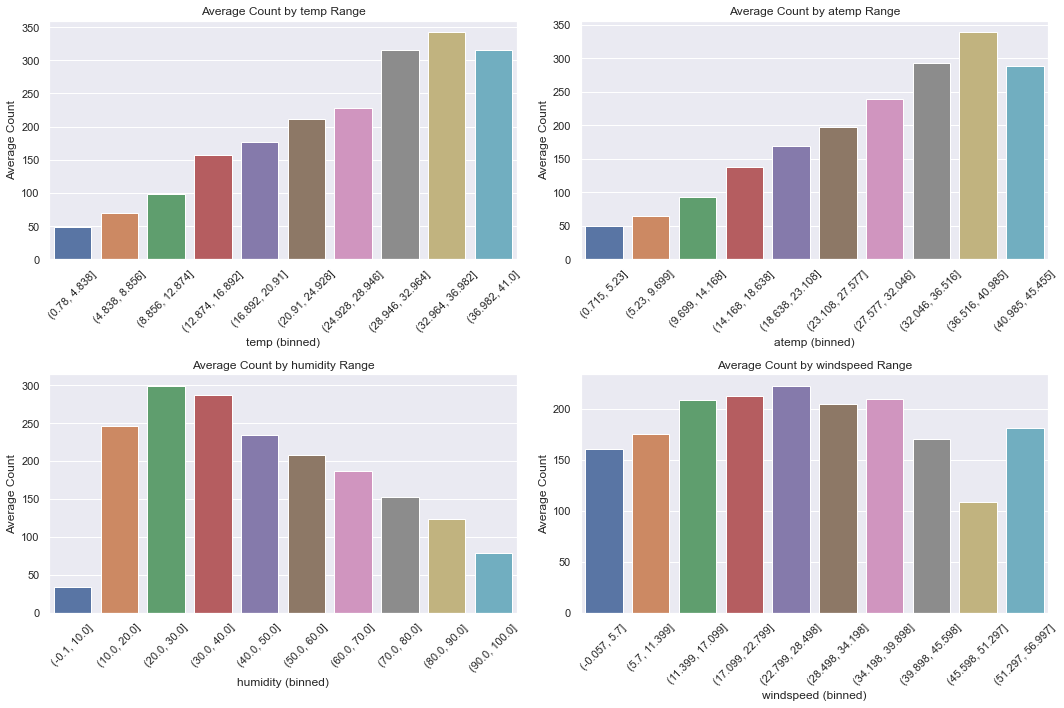

In [18]:
continuous = ["temp", "atemp", "humidity", "windspeed"]

def continuous_plots_with_bins(data, columns, n_bins=10):
    n_cols = 2
    n_rows = (len(columns) + 1) // n_cols

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axs = axs.flatten()

    for i, column_name in enumerate(columns):
        if i >= len(axs):
            break
        
        # Create bins for the continuous variable
        # we are creating bins of 10 size so basically range of 1-10 then 11 to 20 ....
        df['bin'] = pd.cut(df[column_name], bins=n_bins)

        # Calculate mean count for each bin
        # here bin_data will store the mean of count with respect to range 1-10 then 11-20,etc..
        binned_data = df.groupby('bin')['count'].mean().reset_index()

        sns.barplot(x='bin', y='count', data=binned_data, ax=axs[i])
        axs[i].set_xlabel(f"{column_name} (binned)")
        axs[i].set_ylabel("Average Count")
        axs[i].set_title(f"Average Count by {column_name} Range")
        axs[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()

continuous_plots_with_bins(df, continuous, n_bins=10)

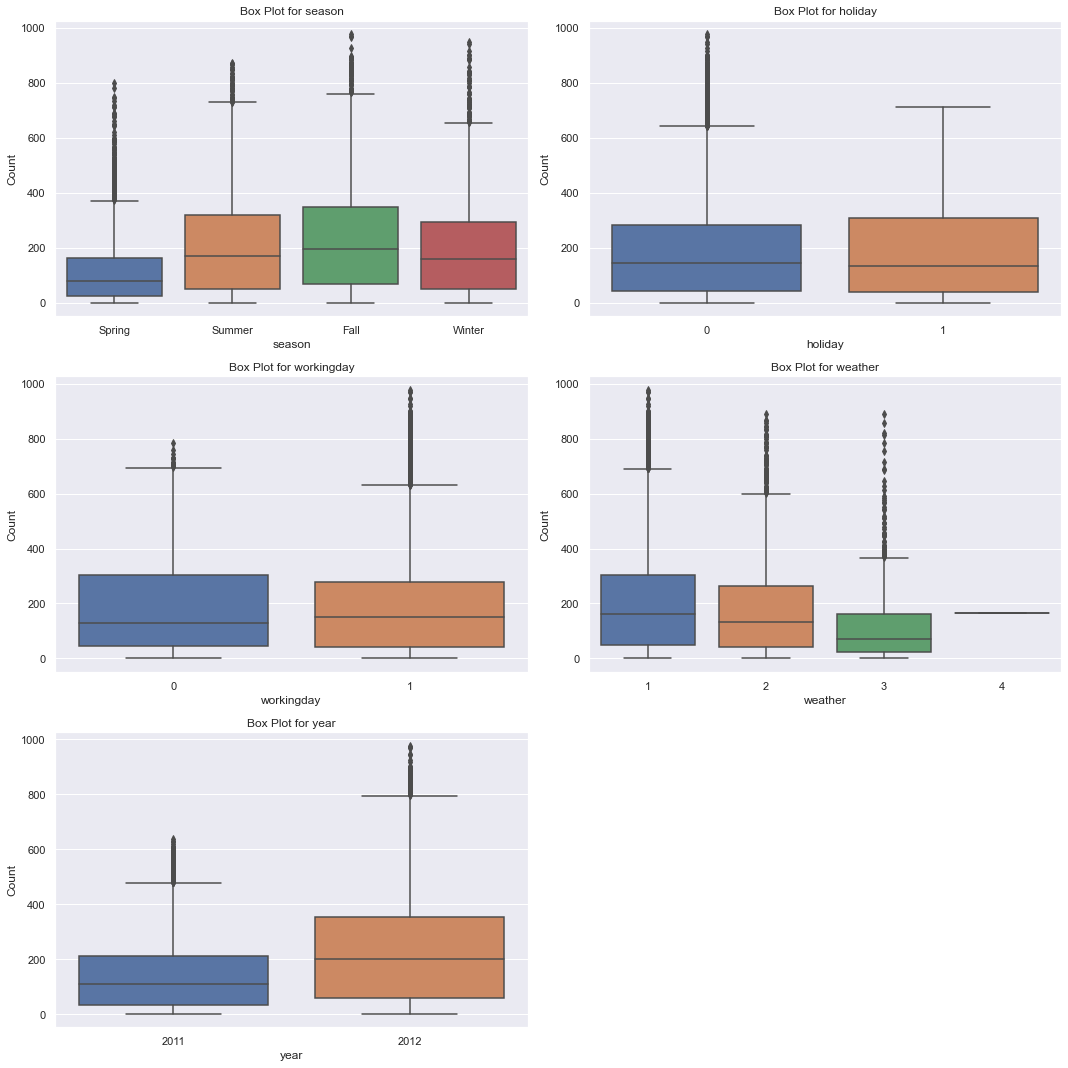

In [79]:
categorical = ["season", "holiday", "workingday", "weather", "year"]

def categorical_plots(data, columns):
    n_cols = 2
    n_rows = (len(columns) + 1) // n_cols

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axs = axs.flatten()

    for i, column_name in enumerate(columns):
        if i >= len(axs):
            break
        sns.boxplot(data=data, x=column_name, y="count", ax=axs[i])
        axs[i].set_xlabel(f"{column_name}")
        axs[i].set_ylabel("Count")
        axs[i].set_title(f"Box Plot for {column_name}")

    # Hide unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()

categorical_plots(df, categorical)

## Relation between dependent and independent variables

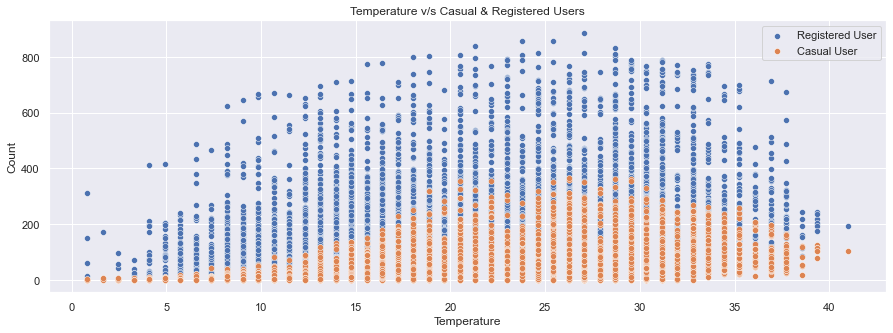

In [98]:
# Plot visualizing difference between casual user and registered user wrt to Temperature
plt.figure(figsize=(15, 5))

sns.scatterplot(x ="temp",y = "registered",data = df,label = "Registered User")
sns.scatterplot(x="temp", y="casual", data=df,label = "Casual User")

plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature v/s Casual & Registered Users')
plt.legend()
plt.show()

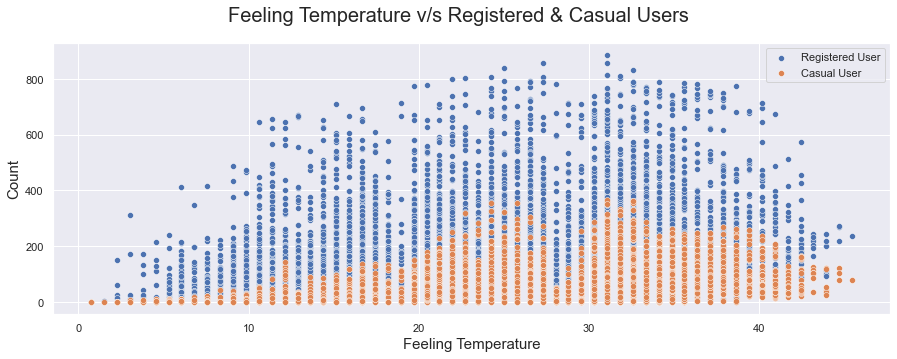

In [100]:
plt.figure(figsize = (15,5))

sns.scatterplot(x = "atemp",y = "registered",data = df,label ="Registered User")
sns.scatterplot(x = "atemp",y = "casual",data = df,label = "Casual User")
plt.suptitle("Feeling Temperature v/s Registered & Casual Users",fontsize = 20)
plt.xlabel("Feeling Temperature",fontsize= 15)
plt.ylabel("Count",fontsize= 15)
plt.show()

## Hypothesis Testing

## Test 1 : To check whether working day has effect on number of bikes rented:

### Null Hypothesis(H0) : There is no significant difference in the mean number of bikes rented between holidays and working days.

### Alternative Hypothesis (H1): There is a significant difference in the mean number of bikes rented between holidays and working days

In [122]:
# Working day has two values i.e. 0 : Holiday and 1 : working day and we have to check if there is difference in count of rented bikes
# Imagine 0 and 1 are  A and B Group 
def AB_Test(data,group,target):
    
    # splitting A and B
    groupA = data[data[group] == 0][target]
    groupB = data[data[group] == 1][target]
    # Null Hypithesis (Ho): Normally distributed vs Alternative Hypothesis (H1): Not Normal
    # shapiro wilk test to check the normality of the data in two groups
    # shapiro returns t_statistic and p-value
    # compare p value  and reject null if p valus <0.05
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05
    
    if (ntA == False) & (ntB == False):
        
        # Levene Test : To check for equal Variance from two groups
        leveneTest = stats.levene(groupA,groupB) < 0.05
        
        if leveneTest == False:
            # homogenity test 
            # calculates the T-test for the means of two independent samples of scores
            # this test tests that 2 independent samples have identical average(expected) values
            # this test assumes that our samples have equal variances
            ttest = stats.ttest_ind(groupA,groupB,equal_var=True)
        else:
            # if variance is not equal
            ttest = stats.ttest_ind(groupA,groupB,equal_var=False)
    
    else:
        # Non Parametric Test when our Assumptions are wrong
         # Its H0: Both group has same distribution means B has distribution as A
        ttest = stats.mannwhitneyu(groupA,groupB)[1]
        
    temp = pd.DataFrame({"AB Hypothesis" : [ttest < 0.05]  , "P-Value":[ttest]})
    temp["test_type"] = np.where((ntA == False) & (ntB == False),"Parametric","Non Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False,"No sufficient Evidence To Reject NULL Hypothesis","Strong Evidence To Reject NULL Hypothesis")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "No sufficient Evidence To Reject NULL Hypothesis","A/B Groups Are Similar","A/B Groups Are Not Similar")
    
    if (ntA == False) & (ntB == False):
        temp["Homogenity"] = np.where(leveneTest==False,"Yes","No")
        temp = temp[["test_type", "Homogeneity","AB Hypothesis", "P-Value", "Comment"]]
    else:
        temp = temp[["test_type","AB Hypothesis", "P-Value", "Comment"]]
        
    return temp

In [123]:
AB_Test(df,group = "workingday",target = "count")

C:\Users\DWAIPAYAN\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,test_type,AB Hypothesis,P-Value,Comment
0,Non Parametric,No sufficient Evidence To Reject NULL Hypothesis,0.967914,A/B Groups Are Similar


## Conclusion of Test 1: Hence Working Day does not have any effect on number of bikes rented

## Test 2 : To test No. of bikes rented similar or different in different seasons

### Null Hypothesis H0: Number of bikes rented are similar in different seasons

### Alternate Hypothesis H1: Number of bikes rented are different in different seasons

### Since shapiro wilk test fails to claim that the distribution is normal and the data is passing Levene's test, Kruskal Wallis test becomes the first choice. If the data doesn’t pass Levene’s test, then probably Welch ANOVA is the better choice. 

In [124]:
#As season column contains different groups such as season (1: spring, 2: summer, 3: fall, 4: winter)

#So we will use Kruskal-Wallis Test by ranks, which ranks all the data points from all the groups and combine them. 
#If there are ties then they are given average rank

#Calculate Test Statistic, p-value and compare with alpha=0.05

#If p-value > 0.05 -> Fail to Reject Null Hypothesis and p-value < 0.05 Reject Null Hypothesis

In [22]:
def kruskal_wallis(data,group,target):

    unique_groups = data[group].unique()
    samples = [data[data[group] == g][target] for g in unique_groups]
    
    
    # Kruskal Wallis Test
    stat,p_value = stats.kruskal(*samples)
    
    result = pd.DataFrame({
        "Test Type": ["Non Parametric"],
        "Kruskal Statistic": [stat],
        "P-Value": [p_value],
        "Hypothesis": ["Strong Evidence to Reject Null Hypothesis" if p_value < 0.05 else "No Evidence to Reject Null Hypothesis"],
        "Comment": ["Different distributions" if p_value < 0.05 else "No evidence of different distributions"]
    })

    return result

## Conclusion from test 2: Bikes rented are different in different seasons

###  Now we have to find the groups which differ hence we conduct an Post-hoc Analysis which provides us with the groups

### For that we conduct the Dunn's Test

# Dunn Test :

### If the results of a "Kruskal-Wallis" test are statistically significant, then it’s appropriate to conduct Dunn’s Test to determine exactly which groups are different.
### Dunn’s Test performs pairwise comparisons between each independent group and tells you which groups are statistically significantly different at some level of αlpha.
### Whenever we make multiple comparisons at once, it is important to control the family-wise error rate. One way to do so is to adjust the p-values that results from the multiple comparisons.There are several ways to adjust the p-values, but the two most common adjustment methods are:

## 1. The Bonferroni Adjustment✅

### Adjusted p-value = p*m

### where:

### p: The original p-value

### m: The total number of comparisons being made

## 2. The Sidak Adjustment

### Adjusted p-value = 1 – (1-p)m

### where:

### p: The original p-value

### m: The total number of comparisons being made

In [20]:
import scikit_posthocs as sp
def dunn_posthoc_test(data, group, target):
    # Pairwise post-hoc test after Kruskal
    pairwise_results = sp.posthoc_dunn(data, val_col=target, group_col=group, p_adjust='bonferroni')

    return pairwise_results

posthoc_results = dunn_posthoc_test(df, "season", "count")

print(posthoc_results.reset_index())

    index           Fall         Spring        Summer        Winter
0    Fall   1.000000e+00  1.606250e-131  1.917122e-04  1.437431e-09
1  Spring  1.606250e-131   1.000000e+00  3.802061e-91  5.164994e-73
2  Summer   1.917122e-04   3.802061e-91  1.000000e+00  1.781908e-01
3  Winter   1.437431e-09   5.164994e-73  1.781908e-01  1.000000e+00


### All the Pairs who have p-values less than aplha = 0.05 are leading to the difference
### Groups which differ are

#### Fall VS Spring
#### Fall VS Summer
#### Fall VS Winter
#### Sring VS Summer
#### Spring VS Winter

## Problem 3: No. of bikes rented similar or different in different weather

### Null Hypothesis H0 : Number of bikes rented are similar in different weather

### Alternate Hypothesis H1 : Number of bikes are different in different weather

#### Weather:

#### 1: Clear, Few clouds, partly cloudy, partly cloudy

#### 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

#### 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

#### 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [23]:
# We will perform Kruskal Wallis Test just like previous scenario
kruskal_wallis(df,"weather","count")

,Test Type,Kruskal Statistic,P-Value,Hypothesis,Comment
0,Non Parametric,205.002165,3.501611e-44,Strong Evidence to Reject Null Hypothesis,Different distributions


## Conclusion from test 3: Bikes rented are different in different weather

###  Now we have to find the groups which differ hence we conduct an Post-hoc Analysis which provides us with the groups

### For that we conduct the Dunn's Test

In [24]:
# hence we need to perform post hoc analysis
dunn_posthoc_test(df,"weather","count")

,1,2,3,4
1,1.000000e+00,3.786847e-07,1.019009e-43,1.0
2,3.786847e-07,1.000000e+00,2.766733e-22,1.0
3,1.019009e-43,2.766733e-22,1.000000e+00,1.0
4,1.000000e+00,1.000000e+00,1.000000e+00,1.0


### All the Pairs who have p-values less than aplha = 0.05 are leading to the difference
### Groups which differ are

#### Clear, Few clouds, partly cloudy, partly cloudy VS Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#### Clear, Few clouds, partly cloudy, partly cloudy VS Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#### Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist VS Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

# Feature Selection Techniques
### Here we will explore different feature selection technique to select the best possible features for predicting number of bikes rented

In [25]:
df['season']=df['season'].map({'Spring':1,'Summer':2,'Fall':3,'Winter':4})

In [43]:
X=df.loc[:,['month', 'season', 'holiday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
y=df.loc[:, 'count']

### ExtraTreesClassifier

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [37]:
print(model.feature_importances_)

[0.0681393  0.01114191 0.00556093 0.01071434 0.04964759 0.13521115
 0.13760417 0.25789571 0.3240849 ]


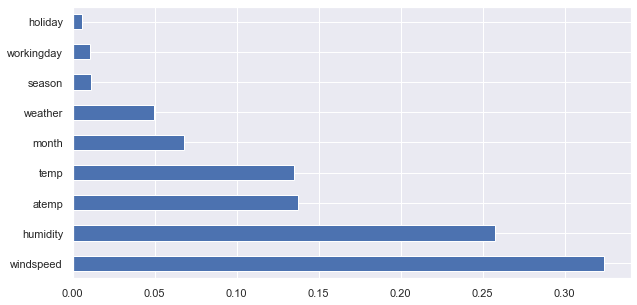

In [38]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

### Correlation Analysis

In [39]:
df1=df.loc[:,['month', 'season', 'holiday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed','count']]

<AxesSubplot:>

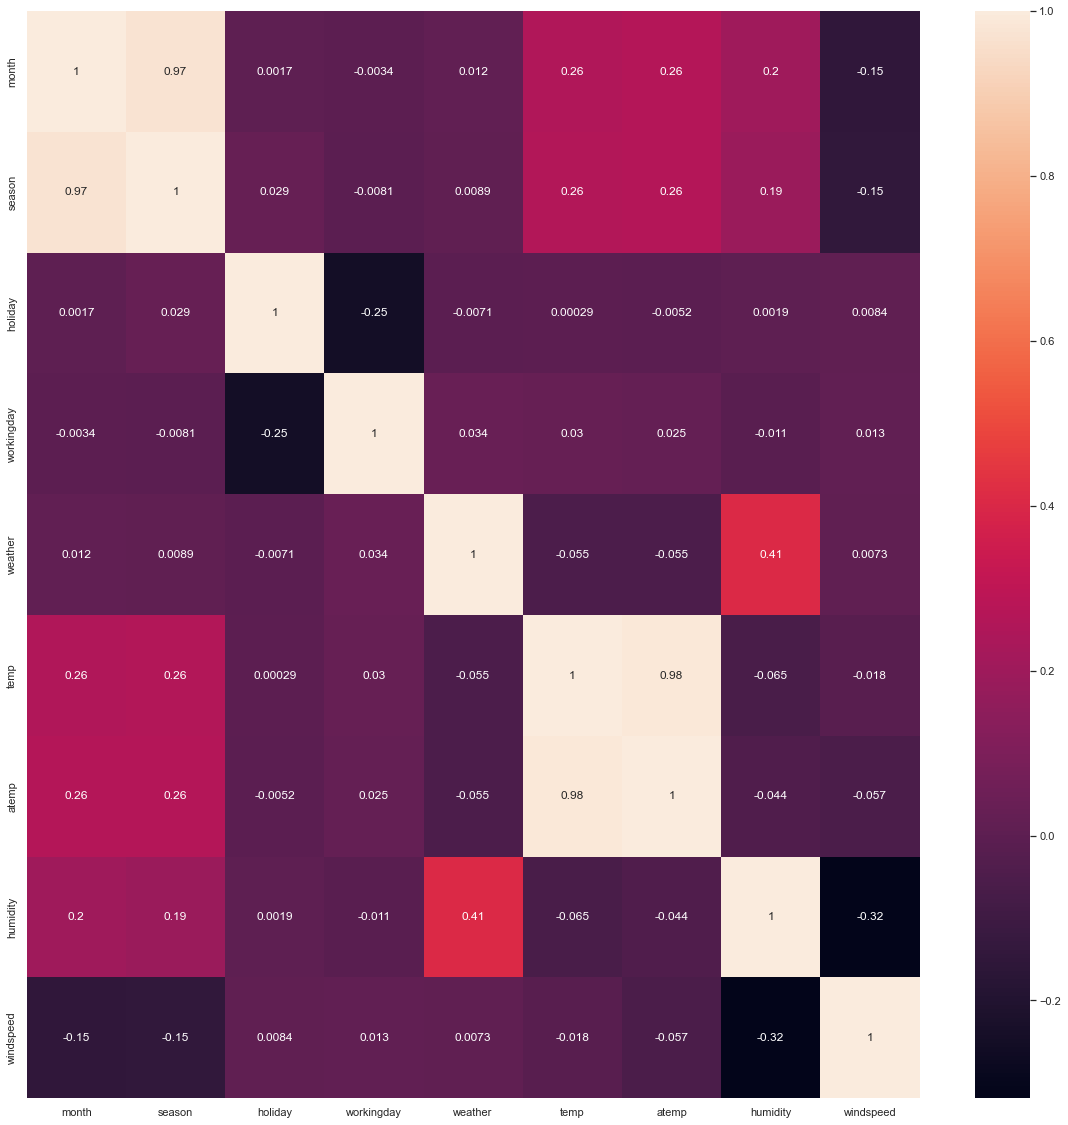

In [40]:
corr=df1.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [41]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [42]:
correlation(df1.iloc[:,:-1],0.60)

{'atemp', 'season'}

### Information Gain

In [44]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

weather       0.392232
workingday    0.233853
season        0.152817
atemp         0.137551
temp          0.128830
month         0.094604
humidity      0.089021
windspeed     0.032732
holiday       0.000000
dtype: float64

### Univariate Selection

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [48]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=6)
ordered_feature=ordered_rank_features.fit(X,y)

dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns=['Features','Score']
features_rank.sort_values(by='Score',ascending=False)

,Features,Score
7,humidity,12286.067545
5,temp,8174.188620
6,atemp,8152.501468
8,windspeed,5282.756907
0,month,2189.557845
2,holiday,681.355480
1,season,610.371058
3,workingday,320.135759
4,weather,234.265530
